In [8]:
%pip install scikit-learn
%pip install matplotlib
%pip install plotly-express
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sn
import numpy as np

In [53]:
data = "boston.csv"

In [54]:
def load_dataset(path):
    return pd.read_csv(path)
boston_dataframe = load_dataset(data)

In [ ]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Summarize")
    print(dataset.describe())
# print_summarize_dataset(boston_dataframe)

In [56]:
def clean_dataset(boston_dataframe):
    return boston_dataframe.isnull().sum()
# clean_dataset(boston_dataframe)

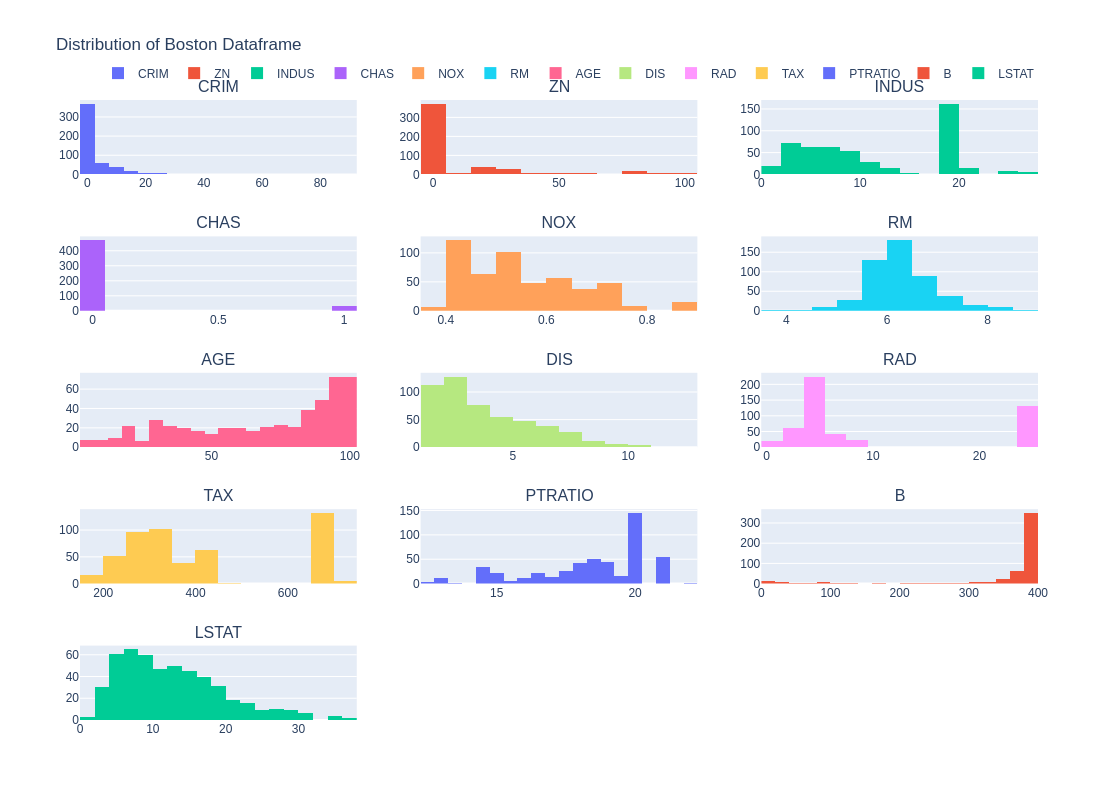

In [57]:
def print_histograms(boston_dataframe):
    fig = make_subplots(rows=5, cols=3, subplot_titles=[
        "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
    ])
    
    fig.add_trace(go.Histogram(x=boston_dataframe['CRIM'], name='CRIM', nbinsx=20), col=1, row=1)
    fig.add_trace(go.Histogram(x=boston_dataframe['ZN'], name='ZN', nbinsx=20), col=2, row=1)
    fig.add_trace(go.Histogram(x=boston_dataframe['INDUS'], name='INDUS', nbinsx=20), col=3, row=1)
    fig.add_trace(go.Histogram(x=boston_dataframe['CHAS'], name='CHAS', nbinsx=20), col=1, row=2)
    fig.add_trace(go.Histogram(x=boston_dataframe['NOX'], name='NOX', nbinsx=20), col=2, row=2)
    fig.add_trace(go.Histogram(x=boston_dataframe['RM'], name='RM', nbinsx=20), col=3, row=2)
    fig.add_trace(go.Histogram(x=boston_dataframe['AGE'], name='AGE', nbinsx=20), col=1, row=3)
    fig.add_trace(go.Histogram(x=boston_dataframe['DIS'], name='DIS', nbinsx=20), col=2, row=3)
    fig.add_trace(go.Histogram(x=boston_dataframe['RAD'], name='RAD', nbinsx=20), col=3, row=3)
    fig.add_trace(go.Histogram(x=boston_dataframe['TAX'], name='TAX', nbinsx=20), col=1, row=4)
    fig.add_trace(go.Histogram(x=boston_dataframe['PTRATIO'], name='PTRATIO', nbinsx=20), col=2, row=4)
    fig.add_trace(go.Histogram(x=boston_dataframe['B'], name='B', nbinsx=20), col=3, row=4)
    fig.add_trace(go.Histogram(x=boston_dataframe['LSTAT'], name='LSTAT', nbinsx=20), col=1, row=5)
    
    fig.update_layout(height=800, width=1600, title="Distribution of Boston Dataframe")
    
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))
    
    return fig.show()
print_histograms(boston_dataframe)

In [58]:
def compute_correlations_matrix(boston_dataframe):
    return boston_dataframe.corr()
correlations = compute_correlations_matrix(boston_dataframe)

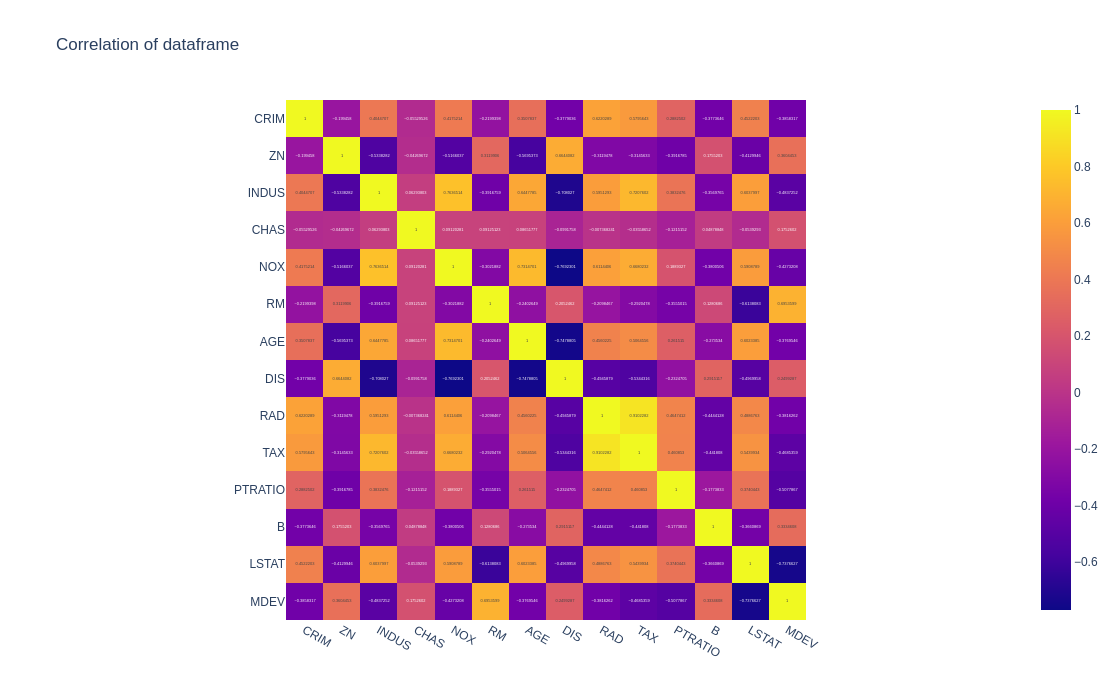

In [59]:
fig = px.imshow(correlations, width=700, height=700, title="Correlation of dataframe", text_auto=True)
fig.show()

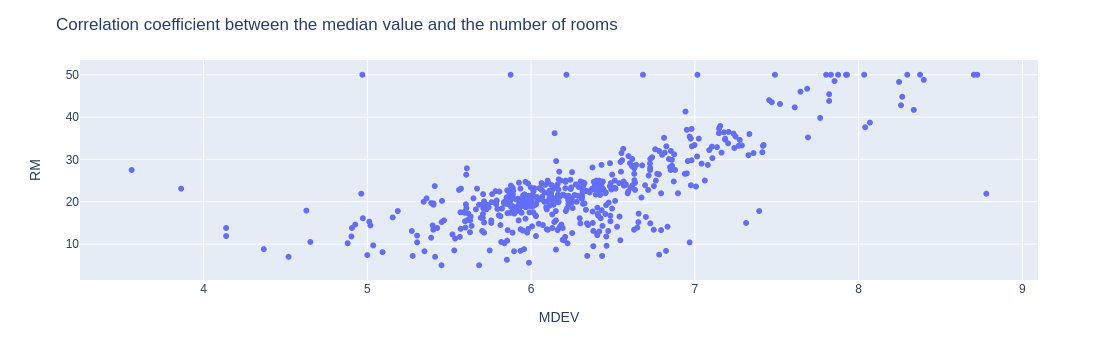

In [110]:
fig = px.scatter(correlation_df, x=boston_dataframe['RM'], y=boston_dataframe['MDEV'])
fig.update_layout(title='Correlation coefficient between the median value and the number of rooms', xaxis_title='MDEV', yaxis_title='RM')
fig.show()

In [62]:
correlations['MDEV']

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64

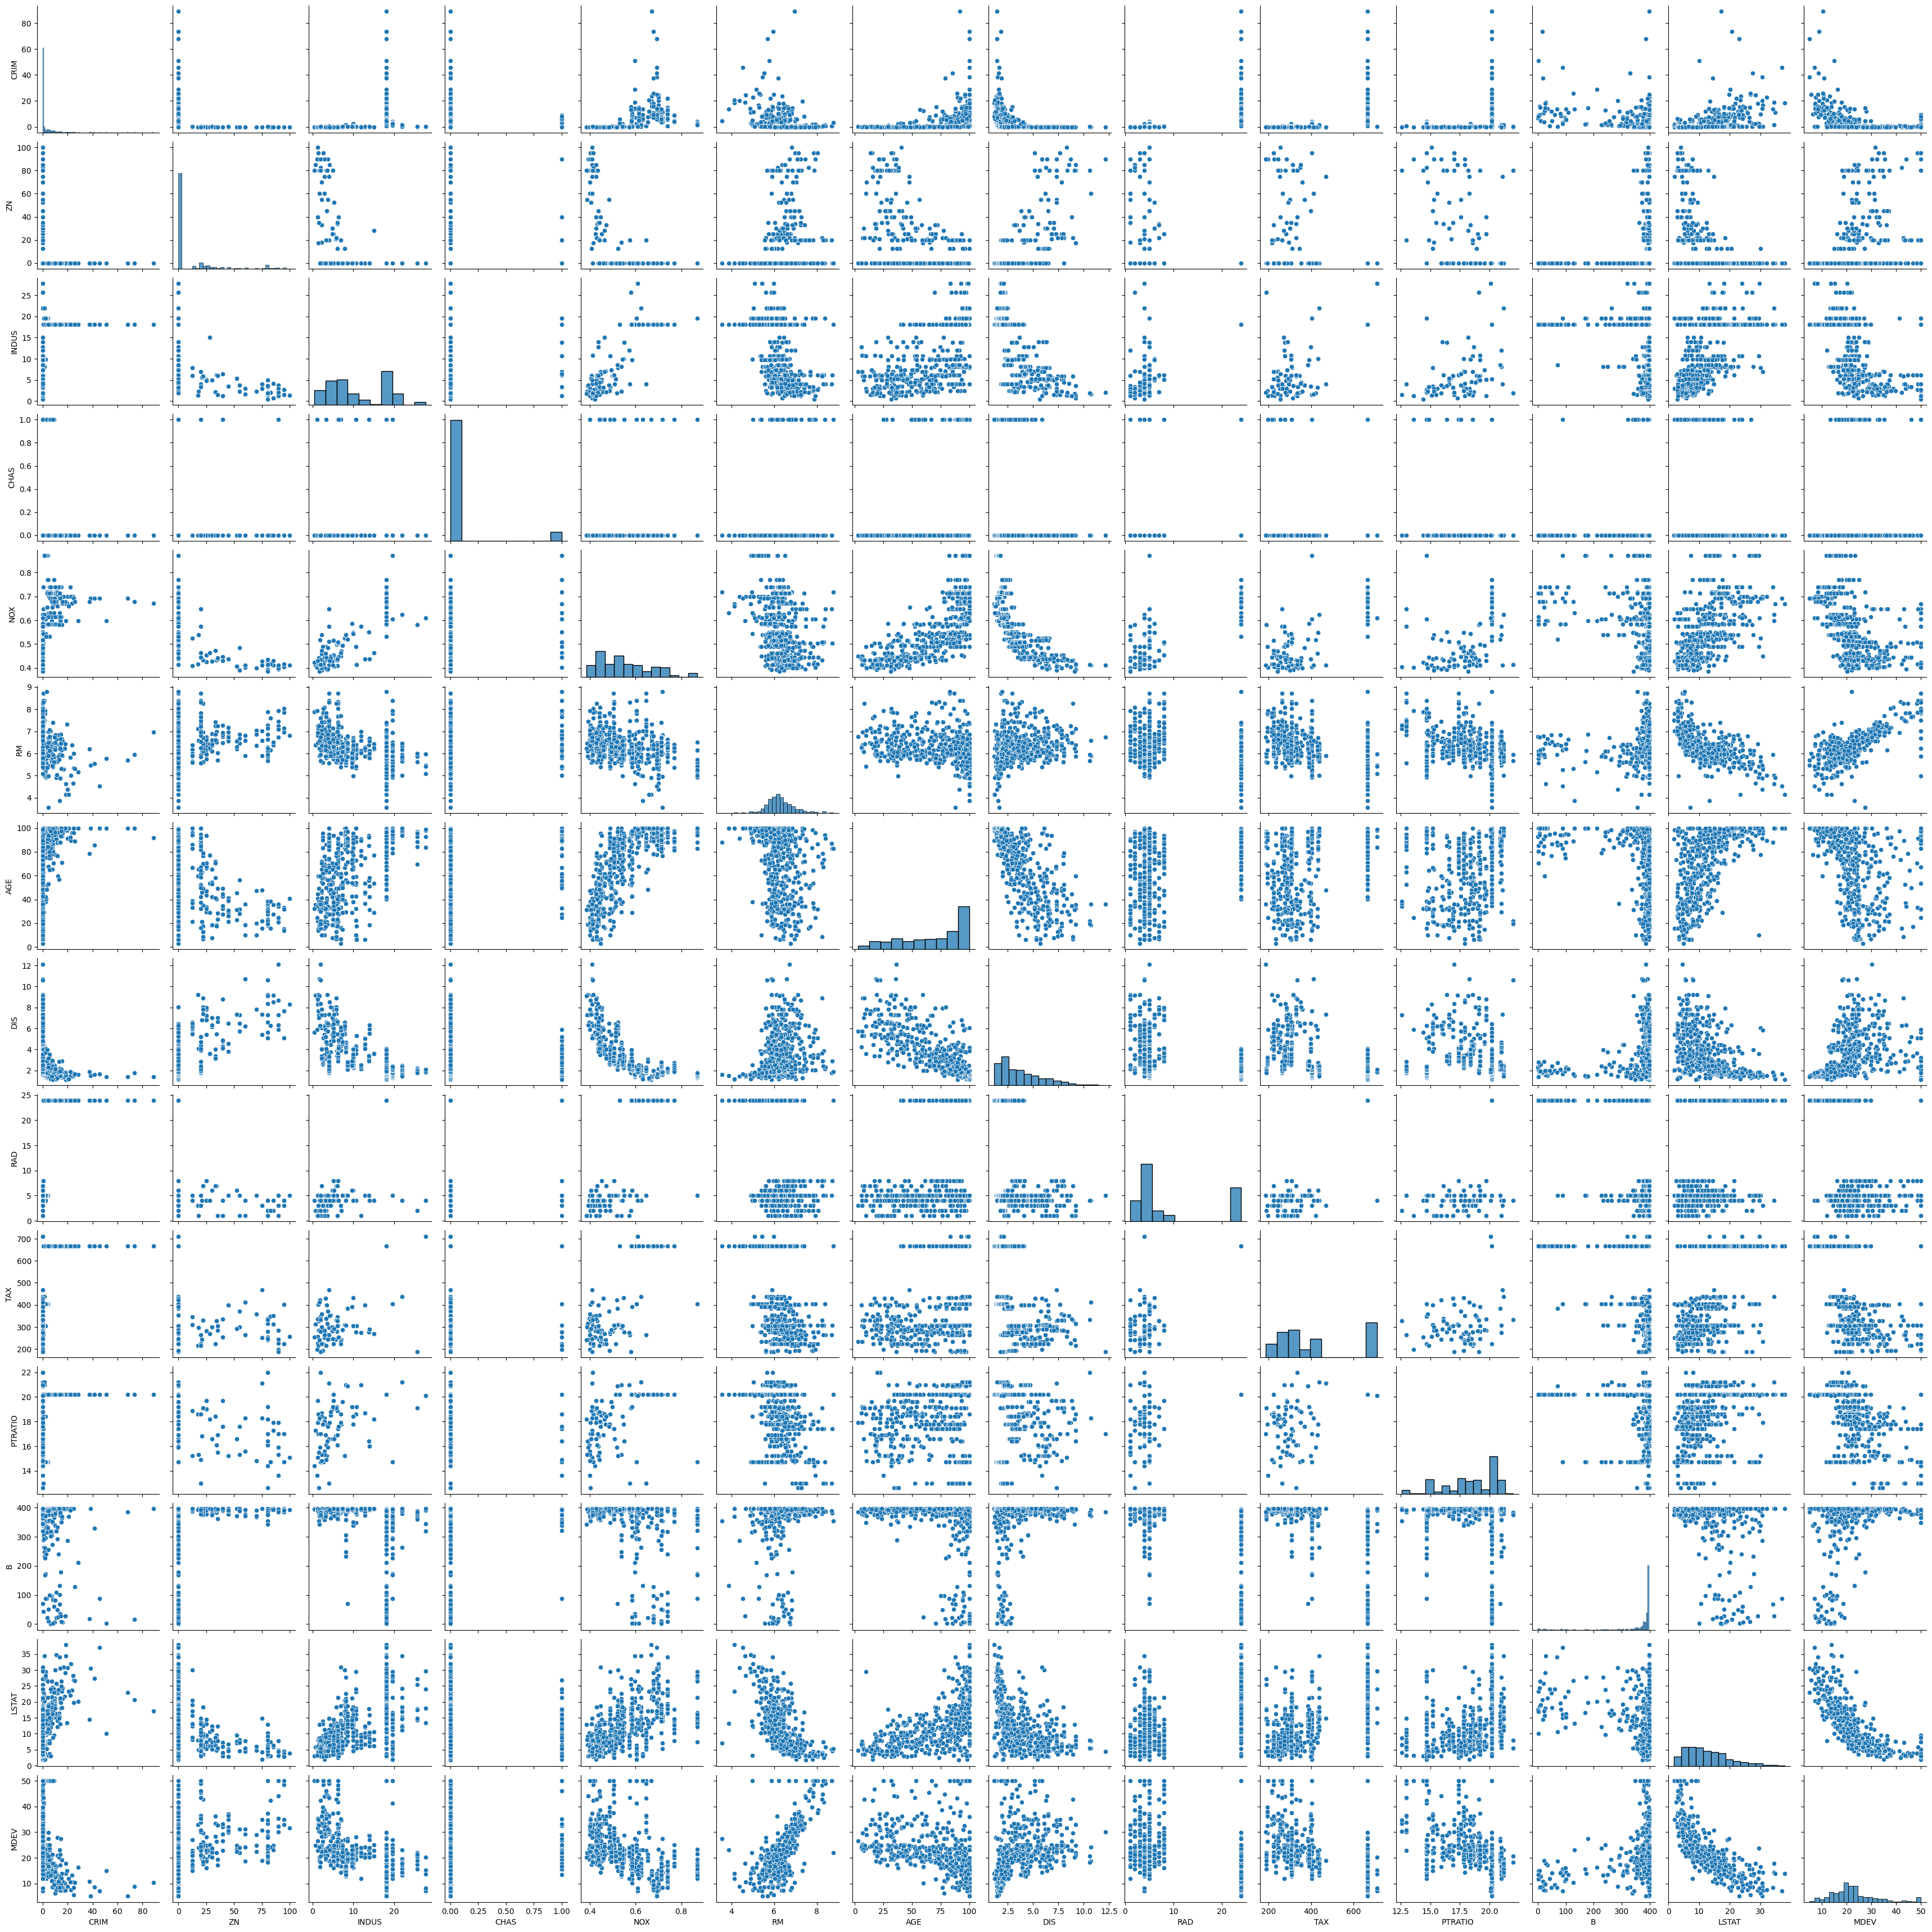

In [63]:
def print_scatter_matrix(boston_dataframe):
    sn.pairplot(boston_dataframe)
    plt.show()
print_scatter_matrix(boston_dataframe)

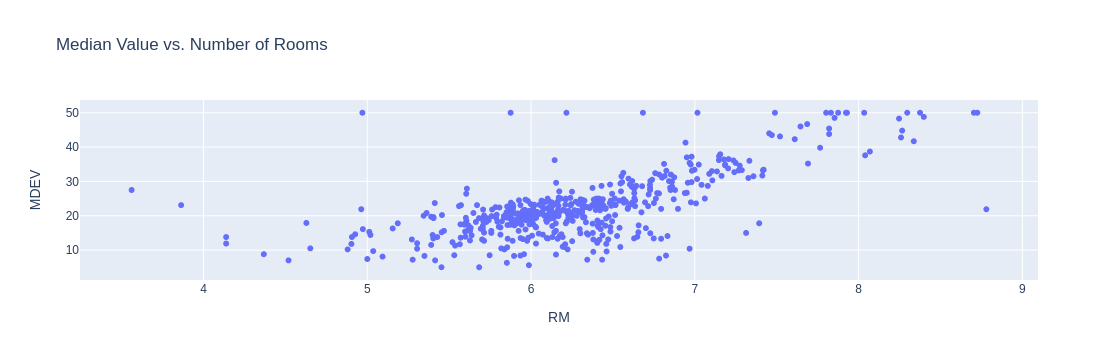

In [64]:
fig = px.scatter(boston_dataframe, x="RM", y="MDEV", title="Median Value vs. Number of Rooms")
fig.show()

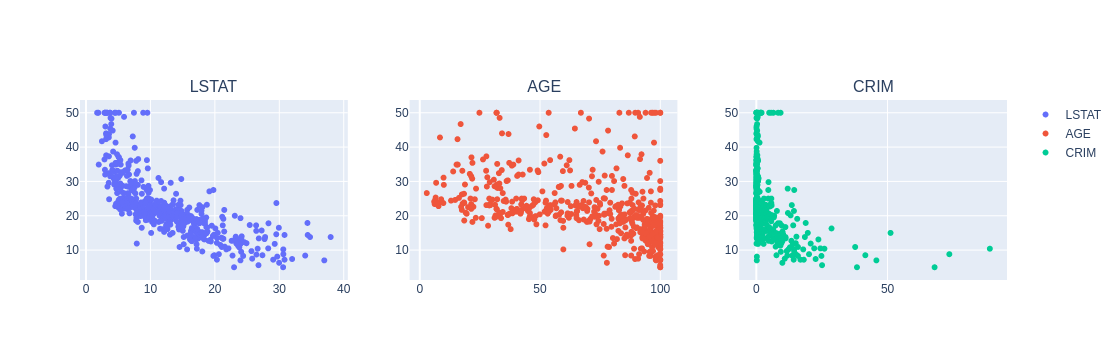

In [65]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['LSTAT', 'AGE', 'CRIM'])


fig.add_trace(go.Scatter(x=boston_dataframe['LSTAT'], y=boston_dataframe['MDEV'], mode='markers', name='LSTAT'), col=1, row=1)
fig.add_trace(go.Scatter(x=boston_dataframe['AGE'], y=boston_dataframe['MDEV'], mode='markers', name='AGE'), col=2, row=1)
fig.add_trace(go.Scatter(x=boston_dataframe['CRIM'], y=boston_dataframe['MDEV'], mode='markers', name='CRIM'), col=3, row=1)

fig.show()

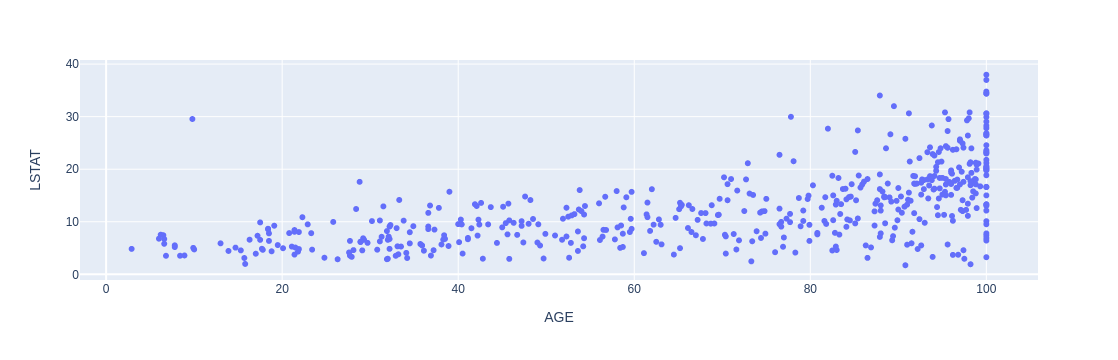

In [66]:
fig = px.scatter(boston_dataframe, x='AGE', y='LSTAT')
fig.show()

In [67]:
def boston_fit_model(boston_dataframe):
    model_dataset = boston_dataframe[['RM', 'MDEV']]
    regressor = LinearRegression()
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    regressor.fit(x, y)
    return regressor

In [68]:
def boston_predict(estimator, array_to_predict):
    return estimator.predict(array_to_predict)

In [69]:
boston_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [111]:
data = np.array([1, 2, 3]).reshape(-1, 1)
estimator = boston_fit_model(boston_dataframe)
y_pred = boston_predict(estimator, data)
y_pred

array([-25.5685118 , -16.46640281,  -7.36429383])

In [106]:
from sklearn.model_selection import train_test_split
model_dataset = boston_dataframe[['RM', 'MDEV']]
regressor = LinearRegression()
x = model_dataset.iloc[:, :-1].values
y = model_dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_pred = boston_predict(estimator, X_test)
r2_score(y_test, y_pred)

0.5943653473817929

In [107]:
def print_model_prediction_evaluator(base_test, prediction):
  print('Mean Absolute Error:', metrics.mean_absolute_error(base_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(base_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(base_test, prediction)))
print_model_prediction_evaluator(y_test, y_pred)

Mean Absolute Error: 4.777679069208447
Mean Squared Error: 40.08781379503893
Root Mean Squared Error: 6.331493804390788
